In [522]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
%matplotlib inline
plt.rcParams['animation.ffmpeg_path'] = '/Users/fraser/opt/miniconda3/envs/project/bin/ffmpeg'
plt.rcParams['animation.html'] = 'html5'
plt.rcParams['figure.figsize'] = 15, 5


import pandas as pd 
import scipy.fftpack
import numpy as np
import os
from scipy.stats import pearsonr

from pyts.image import GramianAngularField
from sklearn.model_selection import train_test_split

In [87]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [2]:
vib_directory = "/Users/fraser/Uni/Year 3/Project/code/data/"

In [3]:
vibration_files = []

for adir in os.listdir(vib_directory):
    if not adir.startswith('.'):
        bdir = vib_directory + f'{adir}/'
        for cdir in os.listdir(bdir):
            if not cdir.startswith('.'):
                ddir = bdir + f'{cdir}/'
                for afile in os.listdir(ddir):
                    if 'vibration' in afile:
                        filepath = ddir + afile
                        vibration_files.append(filepath)

In [91]:
vibration_files

['/Users/fraser/Uni/Year 3/Project/code/data/1bar/half_load/half_load_vibration_data_1bar_half_load.csv',
 '/Users/fraser/Uni/Year 3/Project/code/data/1bar/no_load/no_load_vibration_data_1bar_no_load.csv',
 '/Users/fraser/Uni/Year 3/Project/code/data/1bar/full_load/full_load_vibration_data_1bar_full_load.csv',
 '/Users/fraser/Uni/Year 3/Project/code/data/4bars/half_load/half_load_vibration_data_4bars_half_load.csv',
 '/Users/fraser/Uni/Year 3/Project/code/data/4bars/full_load/full_load_vibration_data_4bars_full_load.csv',
 '/Users/fraser/Uni/Year 3/Project/code/data/healthy/half_load/half_load_vibration_data_healthy_half_load.csv',
 '/Users/fraser/Uni/Year 3/Project/code/data/healthy/no_load/no_load_vibration_data_healthy_no_load.csv',
 '/Users/fraser/Uni/Year 3/Project/code/data/healthy/full_load/full_load_vibration_data_healthy_full_load.csv',
 '/Users/fraser/Uni/Year 3/Project/code/data/inner/half_load/half_load_vibration_data_inner_half_load.csv',
 '/Users/fraser/Uni/Year 3/Project

In [558]:
one = pd.read_csv(vibration_files[0])[' vibration']

In [562]:
one.shape

(720000,)

In [512]:
gasf = GramianAngularField(image_size=28, method='difference')

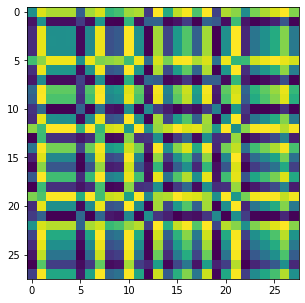

In [513]:
vib1 = np.array(pd.read_csv(vibration_files[0]).diff()[1:6000]).reshape(1,-1)
plt.imshow(gasf.fit_transform(vib1)[0], cmap='viridis')

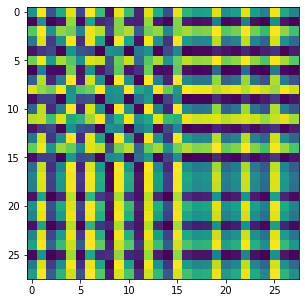

In [515]:
vib2 = np.array(pd.read_csv(vibration_files[6]).diff()[1:6000]).reshape(1,-1)
plt.imshow(gasf.fit_transform(vib2)[0], cmap='viridis')

In [491]:
vib1.shape

(11998, 1)

In [364]:
vib1_f = scipy.fftpack.fft(vib1[' vibration'])

/usr/local/lib/python3.7/site-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


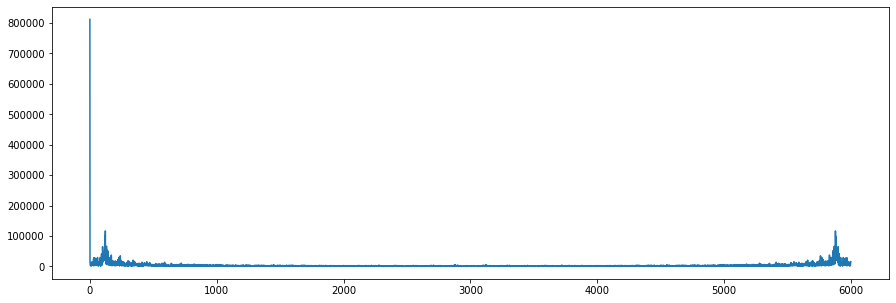

In [365]:
plt.plot(np.abs(vib1_f))

In [366]:
a = np.abs(vib1_f).reshape(1,-1)
b = np.abs(vib2_f).reshape(1,-1)

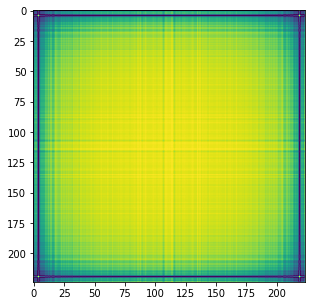

In [367]:
plt.imshow(gasf.fit_transform(a)[0])

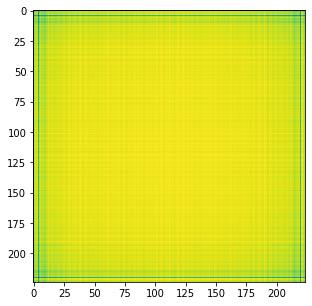

In [368]:
plt.imshow(gasf.fit_transform(b)[0])

In [349]:
vib2_f = scipy.fftpack.fft(vib2[' vibration'])

/usr/local/lib/python3.7/site-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


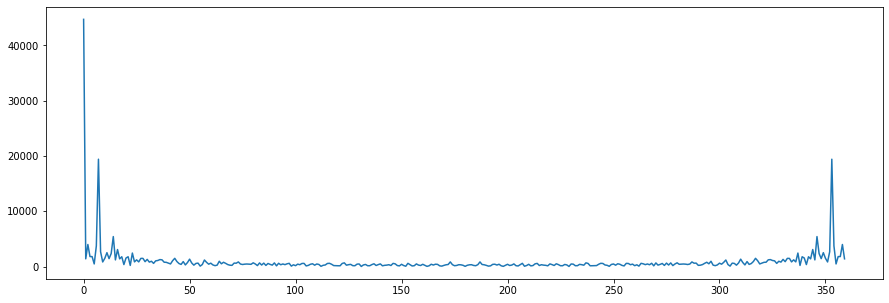

In [350]:
plt.plot(np.abs(vib2_f))

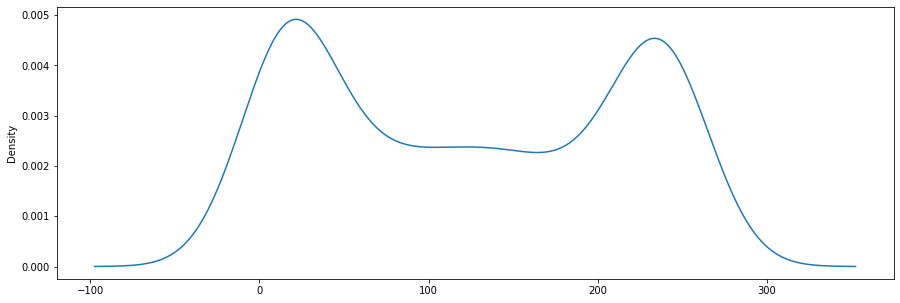

In [351]:
vib2[' vibration'].plot(kind='density')

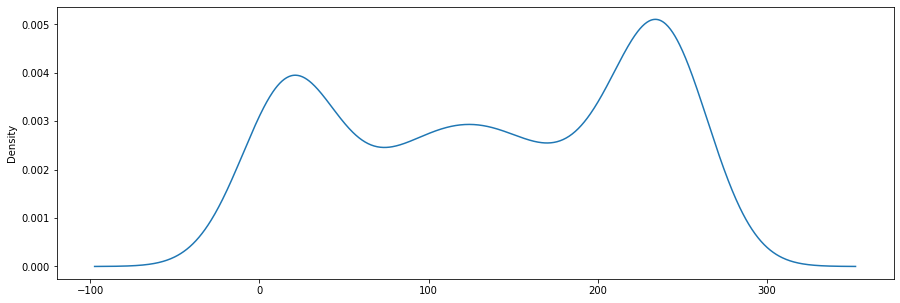

In [300]:
vib3[' vibration'].plot(kind='kde')

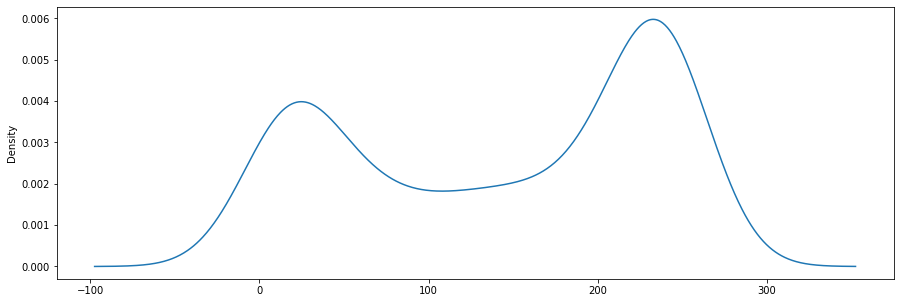

In [302]:
vib4[' vibration'].plot(kind='kde')

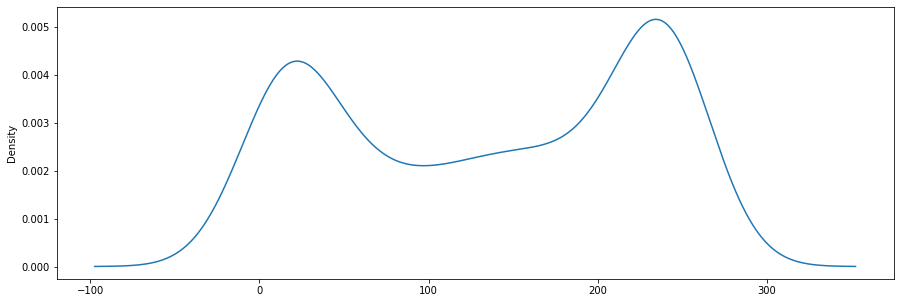

In [303]:
vib5[' vibration'].plot(kind='kde')

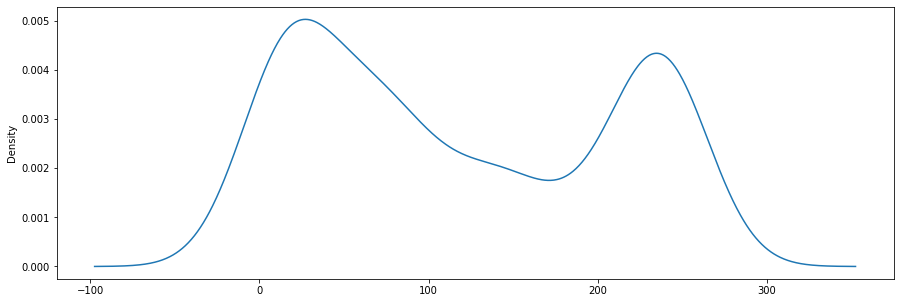

In [304]:
vib6[' vibration'].plot(kind='kde')

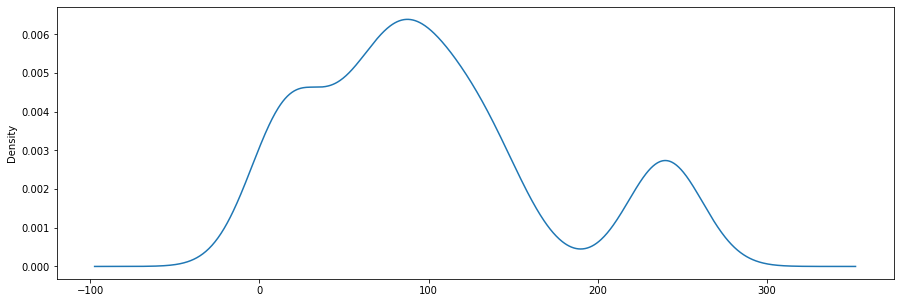

In [306]:
vib7[' vibration'].plot(kind='kde')

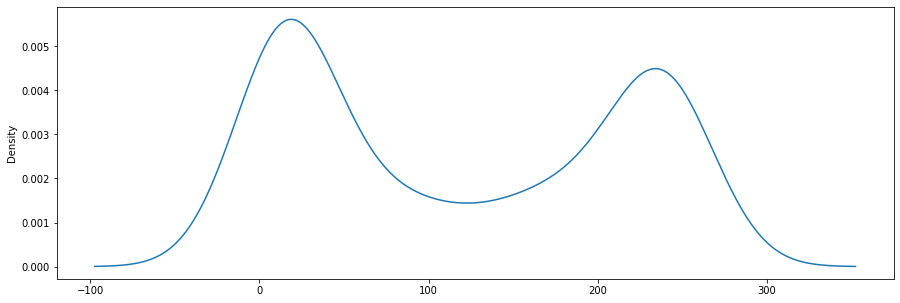

In [307]:
vib8[' vibration'].plot(kind='kde')

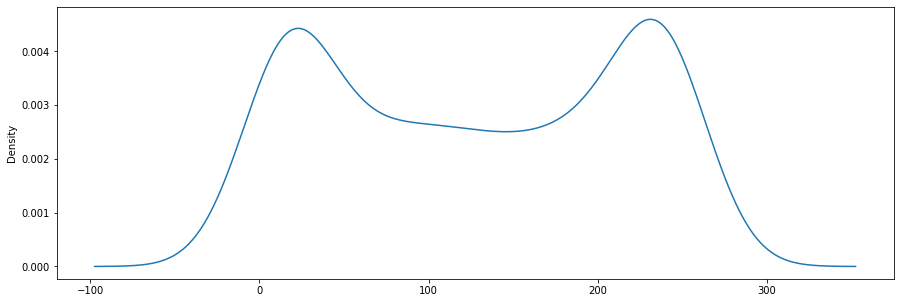

In [308]:
vib9[' vibration'].plot(kind='kde')

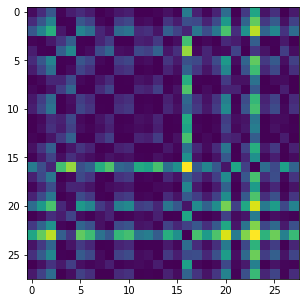

In [228]:
plt.imshow(gasf.fit_transform(np.array(vib1).T)[1])

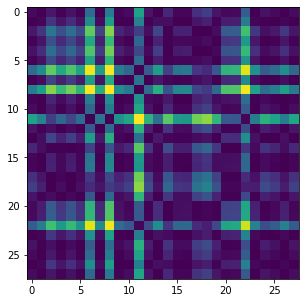

In [229]:
plt.imshow(gasf.fit_transform(np.array(vib2).T)[1])

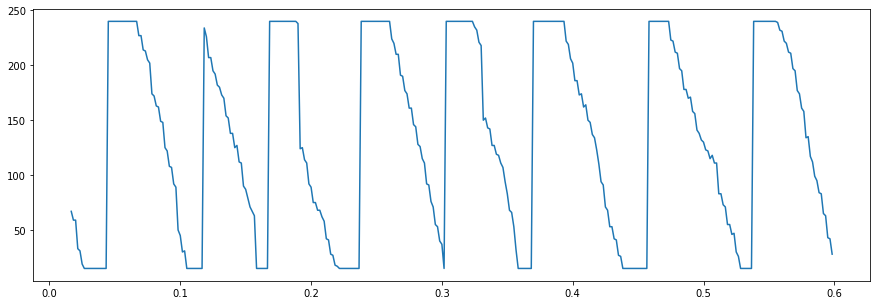

In [287]:
plt.plot(vib1['# time'], vib1[' vibration'])